In [ ]:
import numpy as np

print(np.linalg.eig(np.array([[2, -3], [-3, 4]])))
print(np.linalg.eig(np.array([[4, -2], [-2, 8]])))

EigResult(eigenvalues=array([-0.16227766,  6.16227766]), eigenvectors=array([[-0.81124219,  0.58471028],
       [-0.58471028, -0.81124219]]))
EigResult(eigenvalues=array([3.17157288, 8.82842712]), eigenvectors=array([[-0.92387953,  0.38268343],
       [-0.38268343, -0.92387953]]))


In [ ]:
def find_P(n):
  fence_length = 2 * n + 1
  middle = fence_length // 2

  # Defining the np array p such that p[n][k] is the probability of being on post k after n steps
  p = np.zeros((n + 1, fence_length))

  for i in range(n + 1):
    if i == 0:
      p[i][middle] = 1
    else:
      for j in range(fence_length):
        if j == 0:
          p[i][j] = 1/3 * p[i-1][j] + 1/3 * p[i-1][j + 1]
        elif j == fence_length - 1:
          p[i][j] = 1/3 * p[i-1][j] + 1/3 * p[i-1][j - 1]
        else:
          p[i][j] = 1/3 * p[i-1][j-1] + 1/3 * p[i-1][j] + 1/3 * p[i-1][j + 1]

  # Returning array probabilities of being at each post after n steps
  return p[n]

print(find_P(1))

[0.33333333 0.33333333 0.33333333]


Class 0: intercept (bias): c0= -66.98020872579272
Class 1: intercept (bias): c0= -19.57332903746975
Class 2: intercept (bias): c0= 28.45585340001853


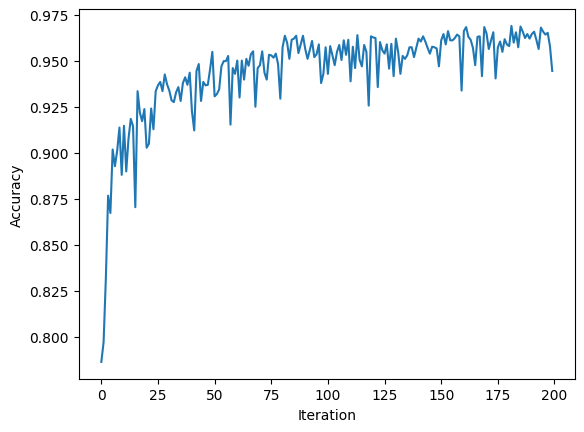

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
import random
import matplotlib.pyplot as plt

D = fetch_openml('dna', as_frame=False)

# Defining the np arrays in terms of the matrices we have discussed in class
X = D.data
y = D.target

clf = SGDClassifier()

accuracy_list = []

for i in range(200):
  indices = random.choices(range(X.shape[0]), k=100)

  X_sample = X[indices,:]
  y_sample = y[indices]

  # Documentation says we only need to define classes parameter on first call to partial_fit
  if i == 0:
      clf.partial_fit(X_sample, y_sample, classes=np.unique(y))
  else:
      clf.partial_fit(X_sample, y_sample)

  accuracy = clf.score(X, y)

  accuracy_list.append(accuracy)

for i, label in enumerate(clf.classes_):
  print(f"Class {i}: intercept (bias): c0= {clf.intercept_[i]}")

plt.plot(accuracy_list)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()